In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from datetime import datetime

In [2]:
gold = pd.read_csv("./goldprice.csv")

### Show the first five rows of the data set.

In [3]:
gold.set_index(['Date']).head(5)

,USD,INR
Date,,
1950-01,34.73,91.696167
1950-02,34.73,91.696167
1950-03,34.73,91.696167
1950-04,34.73,91.696167
1950-05,34.73,91.696167


### Show the description and the info of the data set.

In [4]:
gold.keys()

Index(['Date', 'USD', 'INR'], dtype='object')

In [5]:
gold.describe

<bound method NDFrame.describe of         Date       USD          INR
0    1950-01    34.730    91.696167
1    1950-02    34.730    91.696167
2    1950-03    34.730    91.696167
3    1950-04    34.730    91.696167
4    1950-05    34.730    91.696167
..       ...       ...          ...
842  2020-03  1593.764  4207.948479
843  2020-04  1680.030  4435.712993
844  2020-05  1715.697  4529.883083
845  2020-06  1734.032  4578.292217
846  2020-07  1840.807  4860.205787

[847 rows x 3 columns]>

### Ensure that any date columns have been cast into a datetime object in your DataFrame.

In [6]:
gold['Date'] = pd.to_datetime(gold['Date'])
gold['Date']

0     1950-01-01
1     1950-02-01
2     1950-03-01
3     1950-04-01
4     1950-05-01
         ...    
842   2020-03-01
843   2020-04-01
844   2020-05-01
845   2020-06-01
846   2020-07-01
Name: Date, Length: 847, dtype: datetime64[ns]

### Using a regression model, split your data into train and test data.

In [7]:
gold['Date']=gold['Date'].map(datetime.toordinal)

In [8]:
X = gold['Date'].values
Y = gold['USD'].values

In [9]:
Y = Y.reshape(-1, 1)
X = X.reshape(-1, 1)


### X = The year
### Y = The value of the gold in USD

### Fit your training split to the regression model.

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=.8, test_size=.2, random_state=100)

In [11]:
print(f'X_Train shape [{x_train.shape}]')
print(f'X_Test shape [{x_test.shape}]')
print(f'Y_Train shape [{y_train.shape}]')
print(f'Y_Test shape [{y_test.shape}]')

X_Train shape [(677, 1)]
X_Test shape [(170, 1)]
Y_Train shape [(677, 1)]
Y_Test shape [(170, 1)]


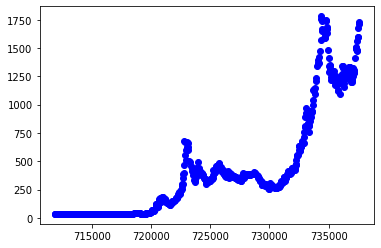

In [12]:
plt.scatter(x_train, y_train, color='blue')

### Show your regression model’s score.

In [13]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [14]:
y_predict = lm.predict(x_test)


In [15]:
print(f'Train Accuracy {round(lm.score(x_train, y_train)* 100, 2)}%')
print(f'Train Accuracy {round(lm.score(x_test, y_test)* 100, 2)}%')

Train Accuracy 69.92%
Train Accuracy 68.01%


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

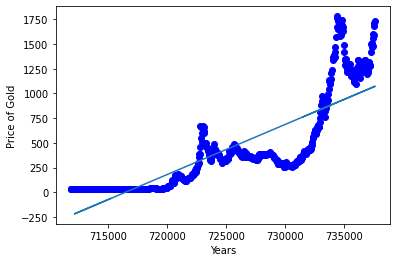

In [16]:
plt.scatter(x_train, y_train, color='Blue')
plt.plot(x_test, y_predict)
plt.xlabel('Years')
plt.ylabel('Price of Gold')
plt.plot

### Draw at least three conclusions from your regression model.

Conclusion 1) The price of gold seems to flucate up and down a lot.

Conclusion 2) while the value of gold does dip significantly it is steadily raising.

Conclusion 3) I believe investing in gold is smart, but to invest on a down swing.

Conclusion 4) I could not find a way to convert the y_train back to datetime. It just wouldn't let me.